In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Stations = Base.classes.station
Measurements = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')

In [10]:
#One year prior
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date:", query_date)

Query Date: 2016-08-23


In [11]:
#Date and PRCP values
info = [Measurements.date, 
       (Measurements.prcp)]
values = session.query(*info).\
    filter(Measurements.date > query_date).\
    group_by(Measurements.date).\
    order_by(Measurements.date).all()
values

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

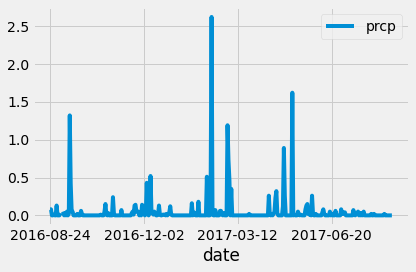

In [12]:
#Pandas Dataframe
df = pd.DataFrame(values, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.line()
plt.tight_layout()
plt.show()

In [13]:
#PRCP Summary
df[["prcp"]].describe()

,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [14]:
# Total station count in "Measurements"
session.query(Measurements.station).order_by(Measurements.station).count()

19550

In [15]:
#Station total
session.query(Measurements.station).group_by(Measurements.station).count()

9

In [16]:
station_1 = session.query(Measurements).\
    filter(Measurements.station == 'USC00519397').count()
station_1

2724

In [17]:
station_2 = session.query(Measurements).\
    filter(Measurements.station == 'USC00513117').count()
station_2

2709

In [18]:
station_3 = session.query(Measurements).\
    filter(Measurements.station == 'USC00514830').count()
station_3

2202

In [19]:
station_4 = session.query(Measurements).\
    filter(Measurements.station == 'USC00517948').count()
station_4

1372

In [20]:
station_5 = session.query(Measurements).\
    filter(Measurements.station == 'USC00518838').count()
station_5

511

In [21]:
station_6 = session.query(Measurements).\
    filter(Measurements.station == 'USC00519523').count()
station_6

2669

In [22]:
station_7 = session.query(Measurements).\
    filter(Measurements.station == 'USC00519281').count()
station_7

2772

In [23]:
station_8 = session.query(Measurements).\
    filter(Measurements.station == 'USC00511918').count()
station_8

1979

In [24]:
station_9 = session.query(Measurements).\
    filter(Measurements.station == 'USC00516128').count()
station_9

2612

In [25]:
#Station count df
array = np.array([[station_1],[station_2],[station_3],[station_4],[station_5],[station_6],[station_7],[station_8],[station_9]])

station_values = ["USC00519397", "USC00513117", "USC00514830", "USC00517948", "USC00518838", "USC00519523", 
                  "USC00519281", "USC00511918", "USC00516128"]

column_values = ["Entries"]

station_count_df = pd.DataFrame(data = array,
                               index = station_values,
                               columns = column_values)
station_count_df

,Entries
USC00519397,2724
USC00513117,2709
USC00514830,2202
USC00517948,1372
USC00518838,511
USC00519523,2669
USC00519281,2772
USC00511918,1979
USC00516128,2612


In [26]:
#Station count desc
sorted_station_df = station_count_df.sort_values("Entries", ascending=False)
sorted_station_df
#Highest observations: Station 7 USC00519281 at 2,772

,Entries
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [27]:
#Full measurements df
measurements_full_df = pd.read_csv('./Resources/hawaii_measurements.csv') 
measurements_full_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_7_df = measurements_full_df.loc[measurements_full_df["station"] == "USC00519281", :]
station_7_df

,station,date,prcp,tobs
12187,USC00519281,2010-01-01,0.15,70
12188,USC00519281,2010-01-02,0.00,62
12189,USC00519281,2010-01-03,0.00,74
12190,USC00519281,2010-01-04,0.00,75
12191,USC00519281,2010-01-05,0.00,74
...,...,...,...,...
14954,USC00519281,2017-08-14,0.00,77
14955,USC00519281,2017-08-15,0.32,77
14956,USC00519281,2017-08-16,0.12,76
14957,USC00519281,2017-08-17,0.01,76


In [29]:
#Lowest Temp
tobs_min = station_7_df.sort_values("tobs", ascending=True)
tobs_min
#54 degrees on 1/16/2013

,station,date,prcp,tobs
13293,USC00519281,2013-01-16,0.02,54
14410,USC00519281,2016-02-08,0.00,56
14053,USC00519281,2015-02-15,1.42,56
14079,USC00519281,2015-03-13,0.06,56
14012,USC00519281,2015-01-05,0.00,56
...,...,...,...,...
14952,USC00519281,2017-08-06,0.00,83
14206,USC00519281,2015-07-18,0.27,83
14255,USC00519281,2015-09-05,0.00,83
14259,USC00519281,2015-09-09,0.00,84


In [30]:
#Highest Temp
tobs_max = station_7_df.sort_values("tobs", ascending=False)
tobs_max
#85 degrees on 9/10/2015

,station,date,prcp,tobs
14260,USC00519281,2015-09-10,0.09,85
14259,USC00519281,2015-09-09,0.00,84
14952,USC00519281,2017-08-06,0.00,83
14255,USC00519281,2015-09-05,0.00,83
14206,USC00519281,2015-07-18,0.27,83
...,...,...,...,...
14410,USC00519281,2016-02-08,0.00,56
14012,USC00519281,2015-01-05,0.00,56
14053,USC00519281,2015-02-15,1.42,56
14079,USC00519281,2015-03-13,0.06,56


In [31]:
#Average temp
avg_temp = station_7_df['tobs'].mean()
avg_temp
r_avg_temp = round(avg_temp, 1)
r_avg_temp

71.7

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
info_m = [Measurements.tobs]
values_m = session.query(*info).\
    filter(Measurements.date > query_date).\
    group_by(Measurements.tobs).\
    order_by(Measurements.date).all()
values_m

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-09-01', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-06', None),
 ('2016-09-23', 0.0),
 ('2016-11-07', 0.0),
 ('2016-11-11', 0.0),
 ('2016-11-24', 0.05),
 ('2016-11-26', 0.05),
 ('2016-11-29', 0.0),
 ('2016-12-03', 0.0),
 ('2016-12-06', 0.02),
 ('2016-12-09', 0.52),
 ('2016-12-12', 0.01),
 ('2016-12-16', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-14', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-02', 0.0),
 ('2017-04-30', 0.8),
 ('2017-05-23', 0.08),
 ('2017-06-12', 0.02),
 ('2017-08-19', None)]

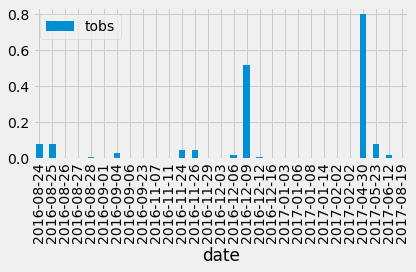

In [33]:
mdf = pd.DataFrame(values_m, columns=['date', 'tobs'])
mdf.set_index('date', inplace=True)
mdf.plot.bar()
plt.tight_layout()
plt.show()

# Close session

In [34]:
# Close Session
session.close()